# Multiview Reconstruction

## Part B: Rotating Objects

Write a function that rotates the model around its center (i.e. the mean of its vertices) for given rotation angles $\alpha,~\beta,~\gamma$ around the x-, y- and z-axis. Use homogeneous coordinates and describe the overall transformation by a single matrix. 

The rotation matrices around the respective axes are as follows:

$R_x = \begin{bmatrix}
1 & 0 & 0 \\
0 & \text{cos}~\alpha & -\text{sin}~\alpha \\
0 & \text{sin}~\alpha & \text{cos}~\alpha
\end{bmatrix}
~~~%
R_y = \begin{bmatrix}
\text{cos}~\beta & 0 & \text{sin}~\beta \\
0 & 1 & 0 \\
-\text{sin}~\beta & 0 & \text{cos}~\beta
\end{bmatrix}
~~~%
R_z = \begin{bmatrix}
\text{cos}~\gamma & -\text{sin}~\gamma & 0 \\
\text{sin}~\gamma & \text{cos}~\gamma & 0 \\
0 & 0 & 1
\end{bmatrix}
$

Rotate the model first 50 degrees around the x-axis and then 25 degrees around the z-axis. Now start again by doing the same rotation around the z-axis first followed by the x-axis rotation. What do you observe?

#### Note that data.zip was not uploaded to GitHub due to its large file size. You can install KITTI-raw and modify the following lines in the code below as you wish:
```python
basedir = 'data/KITTI-Raw'
date = '2011_09_26'
drive = '0079'
```

In [1]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
  inflating: data/model.off          
   creating: data/KITTI-Raw/
  inflating: data/KITTI-Raw/.DS_Store  
   creating: data/KITTI-Raw/2011_09_26/
  inflating: data/KITTI-Raw/2011_09_26/calib_velo_to_cam.txt  
  inflating: data/KITTI-Raw/2011_09_26/.DS_Store  
  inflating: data/KITTI-Raw/2011_09_26/calib_imu_to_velo.txt  
  inflating: data/KITTI-Raw/2011_09_26/calib_cam_to_cam.txt  
   creating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/
  inflating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/.DS_Store  
   creating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/image_03/
  inflating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/image_03/timestamps.txt  
   creating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/image_03/data/
  inflating: data/KITTI-Raw/2011_09_26/2011_09_26_drive_0079_sync/image_03/data/0000000034.png  
  inflating: data/KITTI-Raw/2011_09_26/2011_09_

In [2]:
import open3d as o3d
import numpy as np

def deg2rad(angleInDegrees):
    angleInRadians = (np.pi/180) * angleInDegrees
    return angleInRadians

def rotation(V, alpha_degree, beta_degree, gamma_degree):
    # Compute mean of vertices for vertex list V
    center = np.mean(V, axis=0)

    # Initialize W
    nVertices = V.shape[0]
    W = np.zeros((nVertices, 3))
    
    # Translation matrix (translates the model to the point (0,0,0))
    T = np.hstack((np.eye(3,3), np.reshape(-center, (3,1))))
    T = np.vstack((T, np.array([0,0,0,1])))
 
    # Translation back to the center of V
    T_back = np.hstack((np.eye(3,3), np.reshape(center, (3,1))))
    T_back = np.vstack((T_back, np.array([0,0,0,1])))

    # convert degrees to radians
    alpha, beta, gamma = deg2rad(alpha_degree), deg2rad(beta_degree), deg2rad(gamma_degree)
    
    # Rotation matrices in homegeneuous coordinate
    R_x = np.vstack((np.array([1, 0, 0, 0]),
                     np.array([0, np.cos(alpha), -np.sin(alpha), 0]),
                     np.array([0, np.sin(alpha), np.cos(alpha), 0]),
                     np.array([0, 0, 0, 1])))
    # print(R_x)
    
    R_y = np.vstack((np.array([np.cos(beta), 0, np.sin(beta), 0]),
                     np.array([0, 1, 0, 0]),
                     np.array([-np.sin(beta), 0, np.cos(beta), 0]),
                     np.array([0, 0, 0, 1])))
    # print(R_y)
    
    R_z = np.vstack((np.array([np.cos(gamma), -np.sin(gamma), 0, 0]),
                     np.array([np.sin(gamma), np.cos(gamma), 0, 0]),
                     np.array([0, 0, 1, 0]),
                     np.array([0, 0, 0, 1])))
    # print(R_z)

    # Overall transformation matrix
    # G = T_back * R_z * R_y * R_x * T (matrix multiplication)
    G = T_back @ R_x @ R_y @ R_z @ T
    
    print(G)

    # Homogeneous coordinates of V
    Vh = np.hstack((V, np.ones((nVertices, 1))))
    
    # Apply the transformation to the vertices
    Wh_t = G @ Vh.T
    Wh = Wh_t.T
    
    # Go back from homogenous to 3D coordinates
    W = Wh[:, :3]
    return W
         
# load the model
mesh = o3d.io.read_triangle_mesh("data/model.off")
# print(mesh)
# print('Vertices:')
V = np.asarray(mesh.vertices)
# print(V)
# print('Triangles:')
F = np.asarray(mesh.triangles)
# print(F)

# display the model
# mesh.compute_vertex_normals()
# o3d.visualization.draw_geometries([mesh])

W = rotation(V, 50, 0, 25)
rotated_mesh = o3d.geometry.TriangleMesh(vertices=o3d.utility.Vector3dVector(W), triangles=mesh.triangles)

# display the rotated model
rotated_mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([rotated_mesh])

print('done!')

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 0.90630779 -0.42261826  0.          0.33576077]
 [ 0.27165378  0.58256342 -0.76604444  0.4805078 ]
 [ 0.32374437  0.69427204  0.64278761 -0.48216732]
 [ 0.          0.          0.          1.        ]]
done!


## Part C: pykitti

There is a nice repository which serves as a development kit for KITTI in python: [pykitti](https://github.com/utiasSTARS/pykitti)

Install it and repeat the steps below with the provided sequence to see what kind of properties of the dataset is available with pykitti. After that, you will compute stereo as you did before, this time by using pykitti.


Drive: 2011_09_26_drive_0079_sync

Frame range: range(0, 50, 5)

IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537150600500771

RGB stereo pair baseline [m]: 0.5327254400790535

First timestamp: 2011-09-26 14:58:03.244023

Second IMU pose:
[[ 0.9411 -0.3364  0.0338  2.9079]
 [ 0.3372  0.9413 -0.0181  1.0507]
 [-0.0257  0.0284  0.9993 -0.0247]
 [ 0.      0.      0.      1.    ]]


Text(0.5, 0.92, 'Third Velodyne scan (subsampled)')

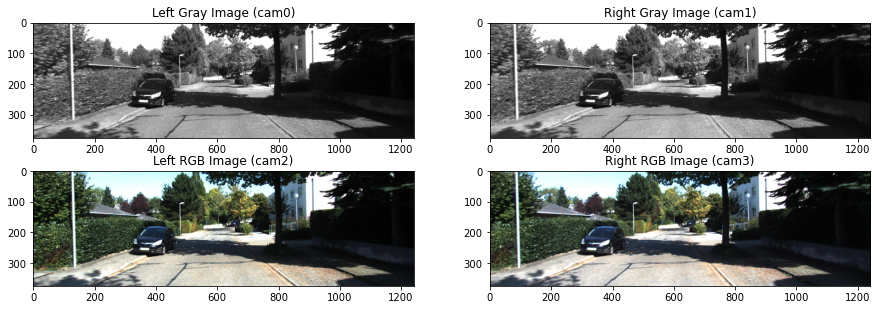

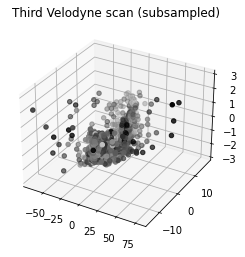

In [3]:
import pykitti
import numpy as np
from util import *

basedir = 'data/KITTI-Raw'
date = '2011_09_26'
drive = '0079'

# The 'frames' argument is optional - default: None, which loads the whole dataset.
# Calibration, timestamps, and IMU data are read automatically. 
# Camera and velodyne data are available via properties that create generators
# when accessed, or through getter methods that provide random access.
dataset = pykitti.raw(basedir, date, drive, frames=range(0, 50, 5))

# dataset.calib:         Calibration data are accessible as a named tuple
# dataset.timestamps:    Timestamps are parsed into a list of datetime objects
# dataset.oxts:          List of OXTS packets and 6-dof poses as named tuples
# dataset.camN:          Returns a generator that loads individual images from camera N
# dataset.get_camN(idx): Returns the image from camera N at idx  
# dataset.gray:          Returns a generator that loads monochrome stereo pairs (cam0, cam1)
# dataset.get_gray(idx): Returns the monochrome stereo pair at idx  
# dataset.rgb:           Returns a generator that loads RGB stereo pairs (cam2, cam3)
# dataset.get_rgb(idx):  Returns the RGB stereo pair at idx  
# dataset.velo:          Returns a generator that loads velodyne scans as [x,y,z,reflectance]
# dataset.get_velo(idx): Returns the velodyne scan at idx  

# Grab some data
second_pose = dataset.oxts[1].T_w_imu
first_gray = next(iter(dataset.gray))
first_cam1 = next(iter(dataset.cam1))
first_rgb = dataset.get_rgb(0)
first_cam2 = dataset.get_cam2(0)
third_velo = dataset.get_velo(2)

# Display some of the data
np.set_printoptions(precision=4, suppress=True)
print('\nDrive: ' + str(dataset.drive))
print('\nFrame range: ' + str(dataset.frames))

print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond IMU pose:\n' + str(second_pose))

f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(first_gray[0], cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(first_cam1, cmap='gray')
ax[0, 1].set_title('Right Gray Image (cam1)')

ax[1, 0].imshow(first_cam2)
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(first_rgb[1])
ax[1, 1].set_title('Right RGB Image (cam3)')


f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, third_velo.shape[0], 100)
ax2.scatter(third_velo[velo_range, 0],
            third_velo[velo_range, 1],
            third_velo[velo_range, 2],
            c=third_velo[velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

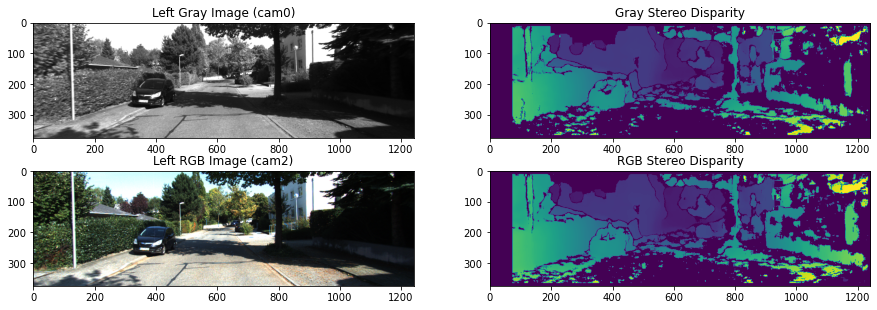

In [4]:
# Do some stereo processing
stereo = cv2.StereoBM_create()
disp_gray = stereo.compute(np.array(first_gray[0]), np.array(first_gray[1]))
disp_rgb = stereo.compute(
    cv2.cvtColor(np.array(first_rgb[0]), cv2.COLOR_RGB2GRAY),
    cv2.cvtColor(np.array(first_rgb[1]), cv2.COLOR_RGB2GRAY))

# Display some data
f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(first_gray[0], cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(disp_gray, cmap='viridis')
ax[0, 1].set_title('Gray Stereo Disparity')

ax[1, 0].imshow(first_rgb[0])
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(disp_rgb, cmap='viridis')
ax[1, 1].set_title('RGB Stereo Disparity')

plt.show()